In [2]:
import keras
import cv2
import numpy as np
import cv2
import os
import glob
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation,Dropout
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def image_to_features(image,size=(75,75)):
    return cv2.resize(image,size)

def data_augmented(image): 
    return cv2.flip(image, 0 )

In [4]:
img_dir = "C:/Users/shk1ply/tensor/train" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
labels = []
for (i,f1) in enumerate(files):
    img = cv2.imread(f1)
    features = image_to_features(img)
    data.append(features)
    label = f1.split(os.path.sep)[-1].split(".")[0]
    labels.append(label)
    
    augmented_image = data_augmented(features)
    data.append(augmented_image)
    labels.append(label)
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(f1)))
        
print (len(data))


[INFO] processed 1000/43
[INFO] processed 2000/43
[INFO] processed 3000/42
[INFO] processed 4000/42
[INFO] processed 5000/42
[INFO] processed 6000/42
[INFO] processed 7000/42
[INFO] processed 8000/42
[INFO] processed 9000/42
[INFO] processed 10000/42
[INFO] processed 11000/42
[INFO] processed 12000/42
[INFO] processed 13000/43
[INFO] processed 14000/43
[INFO] processed 15000/43
[INFO] processed 16000/42
[INFO] processed 17000/42
[INFO] processed 18000/42
[INFO] processed 19000/42
[INFO] processed 20000/42
[INFO] processed 21000/42
[INFO] processed 22000/42
[INFO] processed 23000/42
[INFO] processed 24000/42
50000


In [5]:
print (len(labels))
data = np.array(data,dtype=np.uint8)
labels = np.array(labels)

print (data.shape)
print (labels.shape)

50000
(50000, 75, 75, 3)
(50000,)


In [6]:
(trainData, valData, trainLabels, valLabels) = train_test_split(data, labels, test_size=0.25, random_state=42)

print (trainData.shape)
print (trainLabels.shape)
print (valData.shape)
print (valLabels.shape)


(37500, 75, 75, 3)
(37500,)
(12500, 75, 75, 3)
(12500,)


In [7]:
#Integer Encoding
le = preprocessing.LabelEncoder()
trainlabels_integer_encoded = le.fit_transform(trainLabels)
valLabels_integer_encoded = le.fit_transform(valLabels)

trainData = trainData.astype('float32')
valData = valData.astype('float32')

trainData /= 255
valData /= 255

trainLabels = keras.utils.to_categorical(trainlabels_integer_encoded,2)
valLabels = keras.utils.to_categorical(valLabels_integer_encoded,2)

print (trainData.shape)
print (trainLabels.shape)
print (valData.shape)
print (valLabels.shape)

(37500, 75, 75, 3)
(37500, 2)
(12500, 75, 75, 3)
(12500, 2)


In [8]:
#Initialize the keras model
model = Sequential()
model.add(Convolution2D(20,5,5,border_mode = "same",input_shape = (75,75,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(50, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

C:\Users\shk1ply\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (5, 5), padding="same", input_shape=(75, 75, 3...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#Compiling the model with cross entropy loss and Adadelta optimizer
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])

In [10]:
batch_size = 16
epochs = 20
#Actual training the model
history = model.fit(trainData, trainLabels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(valData, valLabels))

Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 209s 6ms/step - loss: 0.6596 - acc: 0.5915 - val_loss: 0.6085 - val_acc: 0.6715
Epoch 2/20
37500/37500 [==============================] - 204s 5ms/step - loss: 0.5866 - acc: 0.6933 - val_loss: 0.5559 - val_acc: 0.7171
Epoch 3/20
37500/37500 [==============================] - 203s 5ms/step - loss: 0.5531 - acc: 0.7179 - val_loss: 0.5323 - val_acc: 0.7343
Epoch 4/20
37500/37500 [==============================] - 201s 5ms/step - loss: 0.5271 - acc: 0.7387 - val_loss: 0.5180 - val_acc: 0.7562
Epoch 5/20
37500/37500 [==============================] - 202s 5ms/step - loss: 0.5045 - acc: 0.7567 - val_loss: 0.4966 - val_acc: 0.7676
Epoch 6/20
37500/37500 [==============================] - 199s 5ms/step - loss: 0.4864 - acc: 0.7669 - val_loss: 0.4964 - val_acc: 0.7586
Epoch 7/20
37500/37500 [==============================] - 196s 5ms/step - loss: 0.4730 - acc: 0.7776 - val_loss: 0.4748 - 

dict_keys(['acc', 'loss', 'val_loss', 'val_acc'])


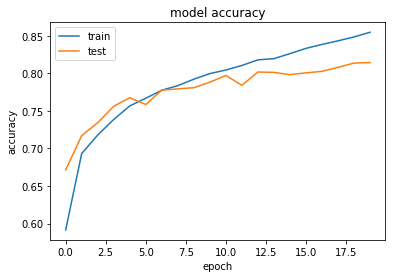

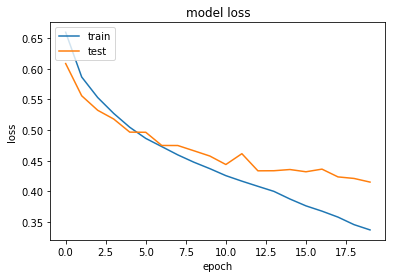

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
model.save('dogs_and_cats_CNN_with_data_augmented_2.h5')

In [14]:
# show the accuracy on the testing set
print("[INFO] evaluating on testing set...")
(loss, accuracy) = model.evaluate(valData, valLabels,batch_size=16, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
 
# dump the network architecture and weights to file
#print("[INFO] dumping architecture and weights to file...")


[INFO] evaluating on testing set...
12500/12500 [==============================] - 21s 2ms/step
[INFO] loss=0.4151, accuracy: 81.4400%


# Test 

[INFO] loading network architecture and weights...
[0.9974427  0.00255731]
[[0.9974427  0.00255731]]
0


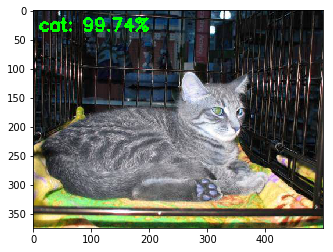

[INFO] Predicted: 0, Actual: 0


In [15]:
# initialize the class labels for the Kaggle dogs vs cats dataset
CLASSES = ["cat", "dog"]
 
# load the network
print("[INFO] loading network architecture and weights...")
model = load_model('dogs_and_cats_CNN_with_data_augmented_2.h5')
#print("[INFO] testing on images in {}".format(args["test_images"]))
#Testing on one test image
test_image = cv2.imread('C:/Users/shk1ply/tensor/test1/3220.jpg')
test_features = image_to_features(test_image)/255.0
test_features = np.array([test_features])
probs = model.predict(test_features)[0]
print (probs)
#Just for printing actual return shape of predict method
prb = model.predict(test_features)
print (prb)
prediction = probs.argmax(axis=0)
print (prediction)
test_label = "{}: {:.2f}%".format(CLASSES[prediction],probs[prediction] * 100)
cv2.putText(test_image, test_label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 255, 0), 3)

plt.imshow(test_image,cmap='gray')
plt.show()
print("[INFO] Predicted: {}, Actual: {}".format(prediction,np.argmax(test_label)))



# Conclusion

The model `dogs_and_cats_CNN_with_data_augmented_2.h5` is not performing well than without augmented version. My initial thought was that the data augmented version should work better with SAME HYPERPARAMETERS. But it is not performing well. 

Potential reasons:

    1. Train loss is decreasing very slowly which suggest that the learning rate is high.
    2. Also need to increase the Epochs but it is taking long.
    3. Another thing which I want to do is to increase the number of filters in conv layers but due to my GPU memory constraints I am not able to make my model more complex.